# Import libraries

In [38]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from rimworld.utils import read_metadata #, one_hot_encode

In [156]:
# Ik wil deze gewoon importen van utils maar dat mag niet om een of andere reden.


def one_hot_encode(lst: np.ndarray, classes = 11):
    one_hot_encoded = np.zeros((lst.size, classes), dtype=int)
    one_hot_encoded[np.arange(lst.size), lst] = 1
    
    return one_hot_encoded.tolist()

# Get train STFT data and labels (Nsynth JSON data)

In [157]:
data_dir = "../../nsynth-data/data/stft/train_data/"
train_data_dir = pathlib.Path(data_dir)

label_dir = "../../nsynth-data/data/nsynth-train/"
train_jsondata = read_metadata(label_dir).sort_index()
labels = train_jsondata.instrument_family


# Get test STFT data and labels

In [158]:
data_dir = "../../nsynth-data/data/stft/test_data"
test_data_dir = pathlib.Path(data_dir)

label_dir = "../../nsynth-data/data/nsynth-test"
test_jsondata = read_metadata(label_dir).sort_index()
test_labels = test_jsondata.instrument_family

# View image for inspection

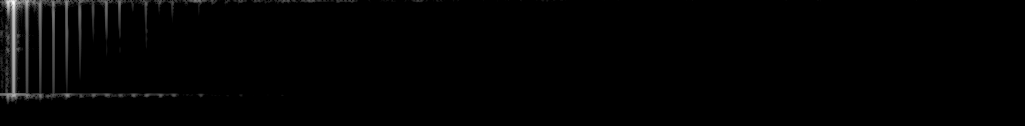

In [159]:
bass_acoustic = list(train_data_dir.glob('*/bass_acoustic*'))
PIL.Image.open(str(bass_acoustic[100]))


In [160]:
import imageio

im = imageio.imread(str(bass_acoustic[100]))
print(im.shape)

(126, 1025, 4)


# View JSON-data and labels



In [161]:
labels

bass_acoustic_000-024-025       0
bass_acoustic_000-024-050       0
bass_acoustic_000-024-075       0
bass_acoustic_000-024-100       0
bass_acoustic_000-024-127       0
                               ..
vocal_synthetic_015-096-025    10
vocal_synthetic_015-096-050    10
vocal_synthetic_015-096-075    10
vocal_synthetic_015-096-100    10
vocal_synthetic_015-096-127    10
Name: instrument_family, Length: 289205, dtype: int64

In [162]:
images = list(train_data_dir.glob('train/*.png'))
image_count = len(images)
print(image_count)
[images[0:5], images[-5:]]

289205


[[WindowsPath('../../nsynth-data/data/stft/train_data/train/bass_acoustic_000-024-025.wav.png'),
  WindowsPath('../../nsynth-data/data/stft/train_data/train/bass_acoustic_000-024-050.wav.png'),
  WindowsPath('../../nsynth-data/data/stft/train_data/train/bass_acoustic_000-024-075.wav.png'),
  WindowsPath('../../nsynth-data/data/stft/train_data/train/bass_acoustic_000-024-100.wav.png'),
  WindowsPath('../../nsynth-data/data/stft/train_data/train/bass_acoustic_000-024-127.wav.png')],
 [WindowsPath('../../nsynth-data/data/stft/train_data/train/vocal_synthetic_015-096-025.wav.png'),
  WindowsPath('../../nsynth-data/data/stft/train_data/train/vocal_synthetic_015-096-050.wav.png'),
  WindowsPath('../../nsynth-data/data/stft/train_data/train/vocal_synthetic_015-096-075.wav.png'),
  WindowsPath('../../nsynth-data/data/stft/train_data/train/vocal_synthetic_015-096-100.wav.png'),
  WindowsPath('../../nsynth-data/data/stft/train_data/train/vocal_synthetic_015-096-127.wav.png')]]

# Ensure x and y are the same size

In [163]:
assert image_count == len(labels.values)

# One hot encode the labels

In [164]:
labels = one_hot_encode(labels)
test_labels = one_hot_encode(test_labels)

In [165]:
print(len(images))
print(len(labels))
labels[0]

289205
289205


[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Load as train and val dataset with Keras


In [166]:

batch_size = 32
img_height = 126
img_width = 1025

def gener(folder, batchsize = 32):
    files = glob(os.path.join(folder, "*.png")
    for file in files:
        yield(file)
    # miss nog iets met batches yielden?
model.fit(gener('../data/'), ...)

# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     train_data_dir, 
#     labels = labels,
#     label_mode = 'categorical',
#     image_size=(img_height, img_width),
#     batch_size=batch_size,
#     color_mode = 'rgba'
# )

# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     test_data_dir, 
#     labels = test_labels,
#     label_mode = 'categorical',
#     image_size=(img_height, img_width),
#     batch_size=batch_size,
#     color_mode = 'rgba'
# )


Found 289205 files belonging to 1 classes.
Found 4096 files belonging to 1 classes.



batch_size = 32
img_height = 126
img_width = 1025

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir, 
    labels = labels,
    image_size=(img_height, img_width),
    batch_size=batch_size)